# 房产行情评估

---
Topic:
    - 商业金融
,    - 房地产
,    - 日常生活

Field:
    - 数据挖掘
,    - 预测
,    - 聚类

License:
    - CC-BY 4.0 转载需署名

Ext:
    - .csv

DatasetUsage:
    - 29981
---

## **背景描述**
在当今房地产市场中，准确评估住宅物业的价值对于买家、卖家以及房地产投资者而言至关重要。
本数据集包含了诸多影响住宅价格的核心因素，帮助清晰解析房产价值。它记录了房屋的基本规格，譬如总面积、卧室与浴室数量、楼层情况，同时也涵盖了对现代生活便利性至关重要的细节——是否紧邻主干道、是否设有客人房、有无地下室、是否配备热水供暖及空调系统，乃至停车便利性等。此外，该数据集还特别标注了房产所处地段的受欢迎程度与装修状态，这些都是在评估房产价值时不可忽视的重要方面。

![Image Name](https://cdn.kesci.com/upload/image/sd94tgmess.png?imageView2/0/w/640/h/640)

## **数据说明**
| 字段               | 说明                                       |
|-------------------|------------------------------------------|
| price             | 房产的价格。                              |
| area              | 房产的总面积，以平方英尺为单位。            |
| bedrooms          | 房产中的卧室数量。                        |
| bathrooms         | 房产中的浴室数量。                        |
| stories           | 房产的楼层数。                            |
| mainroad          | 房产是否位于主要道路旁（是/否）。  |
| guestroom         | 房产是否有客房（是/否）。          |
| basement          | 房产是否有地下室（是/否）。        |
| hotwaterheating   | 房产是否有热水供暖系统（是/否）。  |
| airconditioning   | 房产是否有空调（是/否）。          |
| parking           | 房产提供的停车位数量。                    |
| prefarea          | 房产是否位于首选区域（是/否）。    |
| furnishingstatus | 房产的装修状态（精装修、半装修、毛坯）。 |

## **数据来源**
https://www.kaggle.com/datasets/saurabhbadole/housing-price-data


## **问题描述**
房价影响因素分析
构建房价预测模型
最优投资策略识别
房价差异特征探究

## 读取数据

导入数据分析相应的库，读取数据集

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
original_data = pd.read_csv('Housing_Price_Data.csv')
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 评估和清理数据

这个部分我们将对`original_data`进行评估和清理，并把最后的结果保存在新变量`cleaned_data`中

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

In [8]:
cleaned_data = original_data.copy()

### 数据整齐度

In [9]:
cleaned_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从表格结果来看，该数据集共有545条观察值，没有缺失的数据。

数据类型方面，我们知道`mainroad`,`guestroom`,`basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`都是分类数据，可以把数据类型转换为Category

In [11]:
cleaned_data['mainroad'] = cleaned_data['mainroad'].astype('category')
cleaned_data['guestroom'] = cleaned_data['guestroom'].astype('category')
cleaned_data['basement'] = cleaned_data['basement'].astype('category')
cleaned_data['hotwaterheating'] = cleaned_data['hotwaterheating'].astype('category')
cleaned_data['airconditioning'] = cleaned_data['airconditioning'].astype('category')
cleaned_data['prefarea'] = cleaned_data['prefarea'].astype('category')
cleaned_data['furnishingstatus'] = cleaned_data['furnishingstatus'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


### 处理缺失值

`cleaned_data`不存在缺失值，所以不需要对缺失数据进行处理

### 处理重复数据

由于数据集的没有唯一标识符的列，所以只需看有没有全部列一样的观察值

In [15]:
cleaned_data.duplicated().sum()

0

可知该数据集不存在重复数据

### 处理不一致数据

所有分类数据都有可能存在不一致数据，都需要查看

In [17]:
cleaned_data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [19]:
cleaned_data['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [20]:
cleaned_data['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [21]:
cleaned_data['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [22]:
cleaned_data['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [23]:
cleaned_data['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [24]:
cleaned_data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

上述可知，不存在不一致数据

### 无效或错误数据

In [25]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


由上述统计信息来看，`cleaned_data`中没有脱离实际的值

### 保存数据

In [27]:
cleaned_data.to_csv('cleaned_data.csv',index=False)

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

### 房价分布

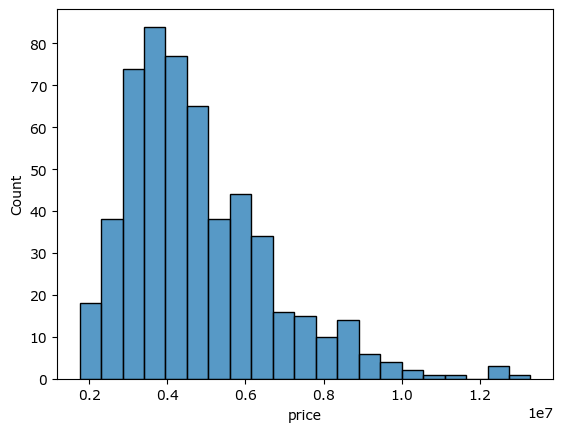

In [29]:
sns.histplot(cleaned_data['price'])
plt.show()

可知房价呈右偏态分布，说明房价集中分布在4,000,000左右，但有少量房价很大的极端值，使得均值被拉高

### 面积与房价

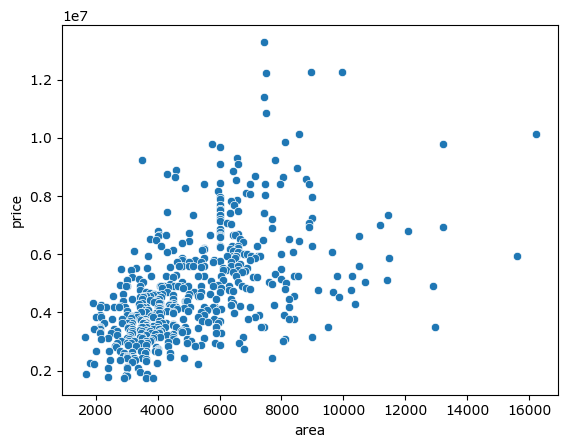

In [31]:
sns.scatterplot(x=cleaned_data['area'], y=cleaned_data['price'])
plt.show()

可见，面积与房价大致呈正相关

### 卧室与房价

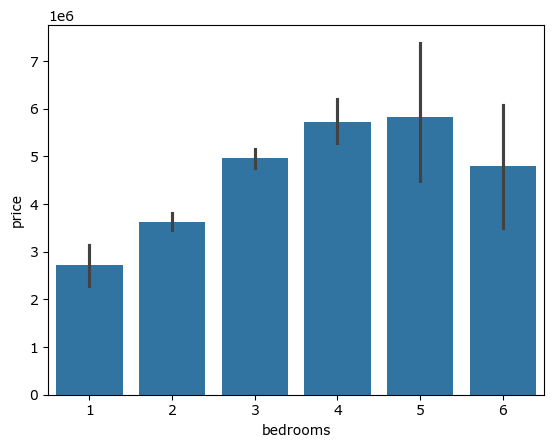

In [33]:
sns.barplot(x=cleaned_data['bedrooms'], y=cleaned_data['price'])
plt.show()


当卧室数为5以下时，房价随着卧室数的增加而增加，之后有下降的趋势